## Dataset: https://www.kaggle.com/luisfredgs/yelp-reviews-csv

In [1]:
#dependecies
import pandas as pd
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
import torch.nn.functional as F
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
PATH='D:/Data Sets/Yelp Reviews CSV/yelp_review.csv'

In [4]:
print(pd.read_csv(PATH))

                      review_id                 user_id  \
0        vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw   
1        n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw   
2        MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw   
3        IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw   
4        L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw   
...                         ...                     ...   
5261663  PoGSiNz1X5SUu0qEt-qM5w  mPjPyipaD0C_myqWqDipZg   
5261664  -CJNPrDWgIkorx4iEZJXIg  mPjPyipaD0C_myqWqDipZg   
5261665  W9eVvOcpBvG6lpJPoJOxuA  mPjPyipaD0C_myqWqDipZg   
5261666  hqQ1UTFKMN2P1ezUow48OQ  mPjPyipaD0C_myqWqDipZg   
5261667  ldsIs3sGXPJ7WM7VyAm4lQ  mPjPyipaD0C_myqWqDipZg   

                    business_id  stars        date  \
0        AEx2SYEUJmTxVVB18LlCwA      5  2016-05-28   
1        VR6GpWIda3SfvPC-lg9H3w      5  2016-05-28   
2        CKC0-MOWMqoeWf6s-szl8g      5  2016-05-28   
3        ACFtxLv8pGrrxMm6EgjreA      4  2016-05-28   
4        s2I_Ni76bjJN

In [5]:
pd.read_csv('D:/Data Sets/Yelp Reviews CSV/yelp_review.csv',usecols=['text','stars']).head()

,stars,text
0,5,Super simple place but amazing nonetheless. It...
1,5,Small unassuming place that changes their menu...
2,5,Lester's is located in a beautiful neighborhoo...
3,4,Love coming here. Yes the place always needs t...
4,4,Had their chocolate almond croissant and it wa...


In [12]:
df=pd.read_csv(PATH,usecols=['text','stars']).sample(frac=1/200)

In [13]:
df.shape

(26308, 2)

In [14]:
df.head()

,stars,text
3628950,5,Been putting off the new mattress for too long...
1102171,1,"If you want to end up in a lawsuit, either wit..."
3943764,5,I went to Lola Rosa this weekend with my famil...
4697654,5,WHO: Bring the entire family for yummy dessert...
4826986,1,"My mother and I went to this sad, sad shop a f..."


<AxesSubplot:>

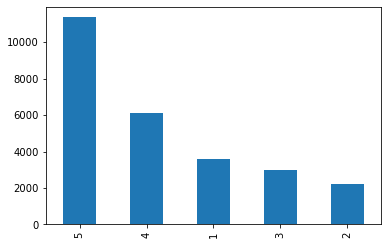

In [15]:
plot=df.stars.value_counts().plot(kind='bar')
plot

In [16]:
df['review']=df['stars']
df.head()

,stars,text,review
3628950,5,Been putting off the new mattress for too long...,5
1102171,1,"If you want to end up in a lawsuit, either wit...",1
3943764,5,I went to Lola Rosa this weekend with my famil...,5
4697654,5,WHO: Bring the entire family for yummy dessert...,5
4826986,1,"My mother and I went to this sad, sad shop a f...",1


In [17]:
df=df.drop('stars',axis=1)

In [18]:
df=df.reset_index(drop=True)
df.head()

,text,review
0,Been putting off the new mattress for too long...,5
1,"If you want to end up in a lawsuit, either wit...",1
2,I went to Lola Rosa this weekend with my famil...,5
3,WHO: Bring the entire family for yummy dessert...,5
4,"My mother and I went to this sad, sad shop a f...",1


In [19]:
rev=[]
for i in df['review']:
    if int(i)>=4:
        i=1
        rev.append(i)
    elif int(i)<=3:
        i=0
        rev.append(i)
    #print(rev[:5])
#print(len(rev))
df['review']=rev
df.head()

,text,review
0,Been putting off the new mattress for too long...,1
1,"If you want to end up in a lawsuit, either wit...",0
2,I went to Lola Rosa this weekend with my famil...,1
3,WHO: Bring the entire family for yummy dessert...,1
4,"My mother and I went to this sad, sad shop a f...",0


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.text.values,df.review.values,test_size=0.2)

In [ ]:
#so now we have already encoded the review variable

In [21]:
#preprocess the data
import re

In [24]:
from tqdm import tqdm
corpus=[]
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()
for i in tqdm(range(x_train.shape[0])):
    text=x_train[i]
    text=text.lower()
    text=re.sub(r"([.,!?\"'*])",' ', text)
    text=re.sub('r[^a-zA-Z0-9]+',' ',text)
    text=text.split()
    text=[wordnet.lemmatize(word) for word in text if word not in stopwords.words('english')]
    text=' '.join(text)
    corpus.append(text)

100%|████████████████████████████████████████████████████████████████████████████| 21046/21046 [10:26<00:00, 33.62it/s]


In [25]:
corpus[1]

'coworkers wanted find place breakfast also business meeting suggested eat located newly upgraded downtown fremont east community one first new restaurant open still thrives today afte opening three year ago yea since restaurant many coworkers neve happy coworkers experience phenomenon chef natalie creative menu stick rib hearty breakfast concern wait time get good thing came early arrived 9am already restaurant 2\\/3rds full seated quickly met hostess offered u drink special day: scotch egg course ordered scotch egg ove small stack pancake appetize along cinnamon biscuit topped fruit compote & deep fried deviled egg ordered usual favorite chicken fried steak egg country style potato hash note: egg prepared preference othe plate ordered corned beef hash shrimp grit steak egg avocado breakfast sandwich food amazing first time come previously disappointment portion huge warning fo dainty eate need come hungry howeve go box needed downtown fremont stop place fo fulfilling eating experienc

In [29]:
for i in range(2):
    print(corpus[i])
    print()

really disappointed boyfriend came fo brunch orde ended wrong ordered huevos rancheros come chicken finish preparing orde chicken hungry realize boyfriend brought attention orde looked small missing something little annoyed serve notice orde complete sure serf dish quite frequently wish would realize annoyed paid $40 fo check tipped great first impression

coworkers wanted find place breakfast also business meeting suggested eat located newly upgraded downtown fremont east community one first new restaurant open still thrives today afte opening three year ago yea since restaurant many coworkers neve happy coworkers experience phenomenon chef natalie creative menu stick rib hearty breakfast concern wait time get good thing came early arrived 9am already restaurant 2\/3rds full seated quickly met hostess offered u drink special day: scotch egg course ordered scotch egg ove small stack pancake appetize along cinnamon biscuit topped fruit compote & deep fried deviled egg ordered usual favo

In [30]:
y_train

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split
import numpy as np

class dataset(Dataset):
    def __init__(self):
        self.tf=TfidfVectorizer(max_df=0.99, min_df=0.005)
        self.x=self.tf.fit_transform(corpus).toarray()
        self.y=y_train
        self.token2idx=self.tf.vocabulary_
        self.idx2token = {idx: token for token, idx in self.token2idx.items()}
        print(self.idx2token)
    
    def __getitem__(self,i):
        return self.x[i, :], self.y[i]
    
    def __len__(self):
        return self.x.shape[0]

In [32]:
data=dataset()
train_loader = DataLoader(data, batch_size=1024)
print(data[5][0].shape)

{1050: 'really', 380: 'disappointed', 173: 'boyfriend', 210: 'came', 519: 'fo', 186: 'brunch', 893: 'orde', 430: 'ended', 1497: 'wrong', 895: 'ordered', 276: 'come', 243: 'chicken', 503: 'finish', 647: 'hungry', 1048: 'realize', 184: 'brought', 98: 'attention', 743: 'looked', 1191: 'small', 808: 'missing', 1206: 'something', 730: 'little', 1152: 'serve', 863: 'notice', 286: 'complete', 1288: 'sure', 385: 'dish', 1033: 'quite', 1475: 'wish', 1491: 'would', 918: 'paid', 15: '40', 237: 'check', 578: 'great', 506: 'first', 1439: 'wanted', 500: 'find', 968: 'place', 177: 'breakfast', 56: 'also', 196: 'business', 786: 'meeting', 1279: 'suggested', 417: 'eat', 737: 'located', 397: 'downtown', 415: 'east', 884: 'one', 846: 'new', 1079: 'restaurant', 887: 'open', 1257: 'still', 1348: 'today', 38: 'afte', 889: 'opening', 1338: 'three', 1500: 'year', 41: 'ago', 1498: 'yea', 1178: 'since', 769: 'many', 845: 'neve', 603: 'happy', 462: 'experience', 242: 'chef', 324: 'creative', 793: 'menu', 1256: '

In [41]:
print(x_train.shape)
print(y_train.shape[0])

(21046,)
21046


In [34]:
class classifier(nn.Module):
    def __init__(self,vocab_size,hidden1,hidden2):
        super(classifier,self).__init__()
        self.fc1=nn.Linear(vocab_size,hidden1)
        self.fc2=nn.Linear(hidden1,hidden2)
        self.fc3=nn.Linear(hidden2,1)
    def forward(self,inputs):
        x=F.relu(self.fc1(inputs.squeeze(1).float()))
        x=F.relu(self.fc2(x))
        return self.fc3(x)

In [35]:
model=classifier(len(data.token2idx), 128, 64)
model

classifier(
  (fc1): Linear(in_features=1511, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

In [36]:
criterion=nn.BCEWithLogitsLoss()
optimizer=optim.Adam([p for p in model.parameters() if p.requires_grad],lr=10**-3)

In [37]:
#training the model
from tqdm import tqdm_notebook

epochs=10
total=0
train_losses=[]
model.train()
for epoch in tqdm(range(epochs)):
    progress_bar=tqdm_notebook(train_loader,leave=False)
    losses=[]
    correct=0
    for inputs,target in progress_bar:
        model.zero_grad()
        output=model(inputs)
        #print(output.shape)
        #print(target.shape)
        loss=criterion(output.squeeze(),target.float())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 3)
        optimizer.step()
        correct += (output == target).float().sum()
        progress_bar.set_description(f'Loss: {loss.item():.3f}')
        losses.append(loss.item())
        total += 1
    epoch_loss = sum(losses) / total
    train_losses.append(epoch_loss)   
    tqdm.write(f'Epoch #{epoch + 1}\tTrain Loss: {epoch_loss:.3f}')

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\91884\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


 10%|████████▎                                                                          | 1/10 [00:02<00:18,  2.08s/it]

Epoch #1	Train Loss: 0.670


 20%|████████████████▌                                                                  | 2/10 [00:03<00:15,  1.96s/it]

Epoch #2	Train Loss: 0.298


 30%|████████████████████████▉                                                          | 3/10 [00:05<00:12,  1.85s/it]

Epoch #3	Train Loss: 0.158


 40%|█████████████████████████████████▏                                                 | 4/10 [00:07<00:10,  1.80s/it]

Epoch #4	Train Loss: 0.090


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:09<00:09,  1.92s/it]

Epoch #5	Train Loss: 0.059


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:11<00:07,  1.89s/it]

Epoch #6	Train Loss: 0.045


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:12<00:05,  1.90s/it]

Epoch #7	Train Loss: 0.037


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:14<00:03,  1.87s/it]

Epoch #8	Train Loss: 0.031


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:16<00:01,  1.86s/it]

Epoch #9	Train Loss: 0.027


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:18<00:00,  1.84s/it]

Epoch #10	Train Loss: 0.024


In [38]:
x_test.shape

(5262,)

In [40]:
y_test.shape

(5262,)

In [52]:
from sklearn.metrics import accuracy_score
def predict(text):
    y_pred=[]
    model.eval()
    with torch.no_grad():
        test_vector = torch.LongTensor(data.tf.transform([text]).toarray())

        output = model(test_vector)
        prediction = torch.sigmoid(output).item()

        if prediction > 0.5:
            #print(f'{prediction:0.3}: Positive sentiment')
            return 1
            #y_pred.append(1)
        else:
            #print(f'{prediction:0.3}: Negative sentiment')
            #y_pred.append(0)
            return 0

In [53]:
count=0
for i in range(x_test.shape[0]):
    text=x_test[i]
    val=predict(text)
    if val==y_test[i]:
        count+=1
print('Accuracy is:',100*count/x_test.shape[0])


Accuracy is: 65.54541999239832
